In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Single variable linear regression

In [379]:
data = np.loadtxt("datasets/ex1data1.txt", delimiter=",")

In [380]:
data.shape

(97, 2)

In [381]:
data

array([[  6.1101 ,  17.592  ],
       [  5.5277 ,   9.1302 ],
       [  8.5186 ,  13.662  ],
       [  7.0032 ,  11.854  ],
       [  5.8598 ,   6.8233 ],
       [  8.3829 ,  11.886  ],
       [  7.4764 ,   4.3483 ],
       [  8.5781 ,  12.     ],
       [  6.4862 ,   6.5987 ],
       [  5.0546 ,   3.8166 ],
       [  5.7107 ,   3.2522 ],
       [ 14.164  ,  15.505  ],
       [  5.734  ,   3.1551 ],
       [  8.4084 ,   7.2258 ],
       [  5.6407 ,   0.71618],
       [  5.3794 ,   3.5129 ],
       [  6.3654 ,   5.3048 ],
       [  5.1301 ,   0.56077],
       [  6.4296 ,   3.6518 ],
       [  7.0708 ,   5.3893 ],
       [  6.1891 ,   3.1386 ],
       [ 20.27   ,  21.767  ],
       [  5.4901 ,   4.263  ],
       [  6.3261 ,   5.1875 ],
       [  5.5649 ,   3.0825 ],
       [ 18.945  ,  22.638  ],
       [ 12.828  ,  13.501  ],
       [ 10.957  ,   7.0467 ],
       [ 13.176  ,  14.692  ],
       [ 22.203  ,  24.147  ],
       [  5.2524 ,  -1.22   ],
       [  6.5894 ,   5.9966 ],
       [

In [382]:
X = data[:, 0]
y = data[:, 1:2]

In [383]:
X.shape

(97,)

In [384]:
X

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

In [385]:
y.shape

(97, 1)

In [386]:
y

array([[ 17.592  ],
       [  9.1302 ],
       [ 13.662  ],
       [ 11.854  ],
       [  6.8233 ],
       [ 11.886  ],
       [  4.3483 ],
       [ 12.     ],
       [  6.5987 ],
       [  3.8166 ],
       [  3.2522 ],
       [ 15.505  ],
       [  3.1551 ],
       [  7.2258 ],
       [  0.71618],
       [  3.5129 ],
       [  5.3048 ],
       [  0.56077],
       [  3.6518 ],
       [  5.3893 ],
       [  3.1386 ],
       [ 21.767  ],
       [  4.263  ],
       [  5.1875 ],
       [  3.0825 ],
       [ 22.638  ],
       [ 13.501  ],
       [  7.0467 ],
       [ 14.692  ],
       [ 24.147  ],
       [ -1.22   ],
       [  5.9966 ],
       [ 12.134  ],
       [  1.8495 ],
       [  6.5426 ],
       [  4.5623 ],
       [  4.1164 ],
       [  3.3928 ],
       [ 10.117  ],
       [  5.4974 ],
       [  0.55657],
       [  3.9115 ],
       [  5.3854 ],
       [  2.4406 ],
       [  6.7318 ],
       [  1.0463 ],
       [  5.1337 ],
       [  1.844  ],
       [  8.0043 ],
       [  1.0179 ],


In [387]:
m = len(y)
m

97

## 1.1. Plotting the data

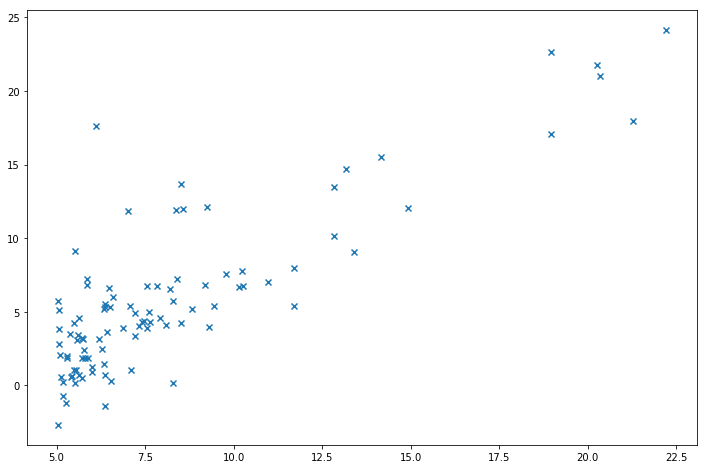

In [388]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(X, y, marker="x")

## 1.2. Cost and gradient descent

In [389]:
X = np.c_[np.ones((m, 1)), X]
X

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [390]:
theta_init = np.zeros(((2, 1)))
theta_init

array([[ 0.],
       [ 0.]])

In [391]:
iterations = 1500
alpha = 0.01

In [392]:
def cost_function(X, y, theta):
    h = X @ theta
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

In [393]:
cost = cost_function(X, y, theta_init)

In [394]:
assert np.round(cost, 2) == 32.07, "Error"

In [395]:
theta_test = np.array([[-1], [2]])
theta_test

array([[-1],
       [ 2]])

In [396]:
cost = cost_function(X, y, theta_test)

In [397]:
assert np.round(cost, 2) == 54.24, "Error"

In [398]:
def gradient_descent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        h = X @ theta
        theta = theta - alpha * (1 / m) * X.T @ (h - y)
    return theta

In [399]:
theta = gradient_descent(X, y, theta_init, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

In [400]:
assert np.round(theta[0], 4) == -3.6303, "Error"

In [401]:
assert np.round(theta[1], 4) == 1.1664, "Error"

In [402]:
# TODO: Plot fitted regression line.

## 1.3. Prediction

In [403]:
# Predict values for population sizes of 35,000 and 70,000
x_pred1 = np.array([[1], [3.5]])
x_pred2 = np.array([[1], [7.0]])

In [404]:
theta.T

array([[-3.63029144,  1.16636235]])

In [405]:
x_pred2

array([[ 1.],
       [ 7.]])

In [411]:
pred1 = theta.T @ x_pred1
pred2 = theta.T @ x_pred2

In [412]:
pred1

array([[ 0.45197679]])

In [413]:
pred2

array([[ 4.53424501]])

In [414]:
assert np.round(pred1[0][0], 3) == 0.452, "Error"
assert np.round(pred2[0][0], 3) == 4.534, "Error"

In [415]:
# TODO: Visualize gradient descent.

## 2. Multiple variables linear regression

In [416]:
data = np.loadtxt("datasets/ex1data2.txt", delimiter=",")

In [417]:
data.shape

(47, 3)

In [418]:
data

array([[  2.10400000e+03,   3.00000000e+00,   3.99900000e+05],
       [  1.60000000e+03,   3.00000000e+00,   3.29900000e+05],
       [  2.40000000e+03,   3.00000000e+00,   3.69000000e+05],
       [  1.41600000e+03,   2.00000000e+00,   2.32000000e+05],
       [  3.00000000e+03,   4.00000000e+00,   5.39900000e+05],
       [  1.98500000e+03,   4.00000000e+00,   2.99900000e+05],
       [  1.53400000e+03,   3.00000000e+00,   3.14900000e+05],
       [  1.42700000e+03,   3.00000000e+00,   1.98999000e+05],
       [  1.38000000e+03,   3.00000000e+00,   2.12000000e+05],
       [  1.49400000e+03,   3.00000000e+00,   2.42500000e+05],
       [  1.94000000e+03,   4.00000000e+00,   2.39999000e+05],
       [  2.00000000e+03,   3.00000000e+00,   3.47000000e+05],
       [  1.89000000e+03,   3.00000000e+00,   3.29999000e+05],
       [  4.47800000e+03,   5.00000000e+00,   6.99900000e+05],
       [  1.26800000e+03,   3.00000000e+00,   2.59900000e+05],
       [  2.30000000e+03,   4.00000000e+00,   4.4990000

In [419]:
X = data[:, 0:2]
y = data[:, 2:]

In [420]:
X.shape

(47, 2)

In [421]:
X

array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00],
       [  1.98500000e+03,   4.00000000e+00],
       [  1.53400000e+03,   3.00000000e+00],
       [  1.42700000e+03,   3.00000000e+00],
       [  1.38000000e+03,   3.00000000e+00],
       [  1.49400000e+03,   3.00000000e+00],
       [  1.94000000e+03,   4.00000000e+00],
       [  2.00000000e+03,   3.00000000e+00],
       [  1.89000000e+03,   3.00000000e+00],
       [  4.47800000e+03,   5.00000000e+00],
       [  1.26800000e+03,   3.00000000e+00],
       [  2.30000000e+03,   4.00000000e+00],
       [  1.32000000e+03,   2.00000000e+00],
       [  1.23600000e+03,   3.00000000e+00],
       [  2.60900000e+03,   4.00000000e+00],
       [  3.03100000e+03,   4.00000000e+00],
       [  1.76700000e+03,   3.00000000e+00],
       [  1.88800000e+03,   2.00000000e+00],
       [  

In [422]:
y.shape

(47, 1)

In [423]:
y

array([[ 399900.],
       [ 329900.],
       [ 369000.],
       [ 232000.],
       [ 539900.],
       [ 299900.],
       [ 314900.],
       [ 198999.],
       [ 212000.],
       [ 242500.],
       [ 239999.],
       [ 347000.],
       [ 329999.],
       [ 699900.],
       [ 259900.],
       [ 449900.],
       [ 299900.],
       [ 199900.],
       [ 499998.],
       [ 599000.],
       [ 252900.],
       [ 255000.],
       [ 242900.],
       [ 259900.],
       [ 573900.],
       [ 249900.],
       [ 464500.],
       [ 469000.],
       [ 475000.],
       [ 299900.],
       [ 349900.],
       [ 169900.],
       [ 314900.],
       [ 579900.],
       [ 285900.],
       [ 249900.],
       [ 229900.],
       [ 345000.],
       [ 549000.],
       [ 287000.],
       [ 368500.],
       [ 329900.],
       [ 314000.],
       [ 299000.],
       [ 179900.],
       [ 299900.],
       [ 239500.]])

In [424]:
m = len(y)
m

47

## 2.1 Feature Normalization

In [425]:
def normalize_feature(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0, ddof=True)
    return X_mean, X_std, (X - X_mean) / X_std

In [426]:
# first normalized, then add bias unit
X_mean, X_std, X = normalize_feature(X)

## 2.2 Gradient Descent

In [427]:
X = np.c_[np.ones((m, 1)), X]

In [428]:
X

array([[  1.00000000e+00,   1.30009869e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -5.04189838e-01,  -2.23675187e-01],
       [  1.00000000e+00,   5.02476364e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -7.35723065e-01,  -1.53776691e+00],
       [  1.00000000e+00,   1.25747602e+00,   1.09041654e+00],
       [  1.00000000e+00,  -1.97317285e-02,   1.09041654e+00],
       [  1.00000000e+00,  -5.87239800e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -7.21881404e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -7.81023044e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -6.37573110e-01,  -2.23675187e-01],
       [  1.00000000e+00,  -7.63567023e-02,   1.09041654e+00],
       [  1.00000000e+00,  -8.56737193e-04,  -2.23675187e-01],
       [  1.00000000e+00,  -1.39273340e-01,  -2.23675187e-01],
       [  1.00000000e+00,   3.11729182e+00,   2.40450826e+00],
       [  1.00000000e+00,  -9.21956312e-01,  -2.23675187e-01],
       [  1.00000000e+00,   3.76643089e-01,   1.0904165

In [429]:
alpha = 1.2
num_iters = 50
theta_init = np.zeros((3, 1))

In [430]:
theta = gradient_descent(X, y, theta_init, alpha, iterations)
theta

array([[ 340412.65957447],
       [ 110631.05027885],
       [  -6649.47427082]])

In [431]:
# TODO: Plot cost when iterating gradient descent and tune alpha.

## 2.3. Prediction

In [480]:
x_pred = np.array([1650, 3])

In [476]:
# first normalized, then add bias unit
x_pred = (x_pred - X_mean) / X_std
x_pred = np.hstack([np.ones(1), x_pred])[:, np.newaxis]

In [477]:
x_pred

array([[ 1.        ],
       [-0.4412732 ],
       [-0.22367519]])

In [478]:
pred = theta.T @ x_pred

In [479]:
pred

array([[ 293081.4643349]])

## 3. Normal equations

In [483]:
data = np.loadtxt("datasets/ex1data2.txt", delimiter=",")

In [484]:
X = data[:, 0:2]
y = data[:, 2:]

In [485]:
X.shape

(47, 2)

In [486]:
X

array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00],
       [  1.98500000e+03,   4.00000000e+00],
       [  1.53400000e+03,   3.00000000e+00],
       [  1.42700000e+03,   3.00000000e+00],
       [  1.38000000e+03,   3.00000000e+00],
       [  1.49400000e+03,   3.00000000e+00],
       [  1.94000000e+03,   4.00000000e+00],
       [  2.00000000e+03,   3.00000000e+00],
       [  1.89000000e+03,   3.00000000e+00],
       [  4.47800000e+03,   5.00000000e+00],
       [  1.26800000e+03,   3.00000000e+00],
       [  2.30000000e+03,   4.00000000e+00],
       [  1.32000000e+03,   2.00000000e+00],
       [  1.23600000e+03,   3.00000000e+00],
       [  2.60900000e+03,   4.00000000e+00],
       [  3.03100000e+03,   4.00000000e+00],
       [  1.76700000e+03,   3.00000000e+00],
       [  1.88800000e+03,   2.00000000e+00],
       [  

In [487]:
y.shape

(47, 1)

In [488]:
y

array([[ 399900.],
       [ 329900.],
       [ 369000.],
       [ 232000.],
       [ 539900.],
       [ 299900.],
       [ 314900.],
       [ 198999.],
       [ 212000.],
       [ 242500.],
       [ 239999.],
       [ 347000.],
       [ 329999.],
       [ 699900.],
       [ 259900.],
       [ 449900.],
       [ 299900.],
       [ 199900.],
       [ 499998.],
       [ 599000.],
       [ 252900.],
       [ 255000.],
       [ 242900.],
       [ 259900.],
       [ 573900.],
       [ 249900.],
       [ 464500.],
       [ 469000.],
       [ 475000.],
       [ 299900.],
       [ 349900.],
       [ 169900.],
       [ 314900.],
       [ 579900.],
       [ 285900.],
       [ 249900.],
       [ 229900.],
       [ 345000.],
       [ 549000.],
       [ 287000.],
       [ 368500.],
       [ 329900.],
       [ 314000.],
       [ 299000.],
       [ 179900.],
       [ 299900.],
       [ 239500.]])

In [489]:
m = len(y)

## 3.1 Params estimation

In [491]:
X = np.c_[np.ones((m, 1)), X]

In [492]:
X

array([[  1.00000000e+00,   2.10400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.60000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.40000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.41600000e+03,   2.00000000e+00],
       [  1.00000000e+00,   3.00000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.98500000e+03,   4.00000000e+00],
       [  1.00000000e+00,   1.53400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.42700000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.38000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.49400000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.94000000e+03,   4.00000000e+00],
       [  1.00000000e+00,   2.00000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   1.89000000e+03,   3.00000000e+00],
       [  1.00000000e+00,   4.47800000e+03,   5.00000000e+00],
       [  1.00000000e+00,   1.26800000e+03,   3.00000000e+00],
       [  1.00000000e+00,   2.30000000e+03,   4.0000000

In [544]:
def normal_equation(X, y):
    return np.linalg.pinv(X.T @ X) @ (X.T @ y)

In [545]:
theta = normal_equation(X, y)

In [547]:
# values are different then in gradient descent case because we do not scale the data here!
theta

array([[ 89597.90954361],
       [   139.21067402],
       [ -8738.01911255]])

## 3.2 Prediction

In [558]:
x_pred = np.array([1, 1650, 3])[:, np.newaxis]

In [559]:
x_pred

array([[   1],
       [1650],
       [   3]])

In [560]:
pred = theta.T @ x_pred

In [561]:
pred

array([[ 293081.46433499]])